# Daily Temp Prediction ARIMA

In [81]:
import pandas as pd

In [82]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [83]:
def d_parser(x):
    return datetime.strptime(x, '%m/%d/%Y')
dm = pd.read_csv('DATA_TEMP_DATE_JA.csv',parse_dates=['Date'], date_parser=d_parser)

In [84]:
dm.head()

,Date,T2M,YEAR,MO,DY
0,1981-02-01,18.29,1981,2,1
1,1981-02-02,15.67,1981,2,2
2,1981-02-03,15.19,1981,2,3
3,1981-02-04,17.93,1981,2,4
4,1981-02-05,19.73,1981,2,5


<AxesSubplot:>

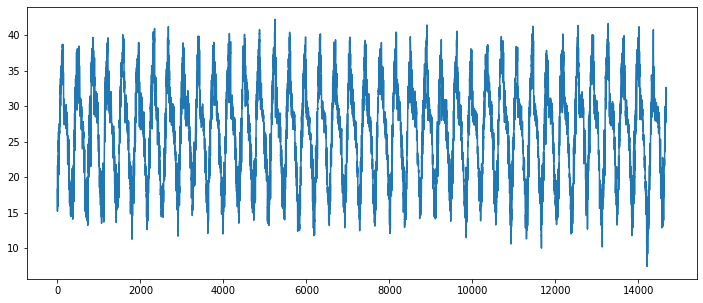

In [85]:
dm['T2M'].plot(figsize=(12,5))

In [86]:
dm.loc[0, 'Date'].day_name()

'Sunday'

In [87]:
dm['Date'].dt.day_name()

0           Sunday
1           Monday
2          Tuesday
3        Wednesday
4         Thursday
           ...    
14664     Saturday
14665       Sunday
14666       Monday
14667      Tuesday
14668    Wednesday
Name: Date, Length: 14669, dtype: object

In [88]:
dm['DayOfWeek'] = dm['Date'].dt.day_name()


In [89]:
dm

,Date,T2M,YEAR,MO,DY,DayOfWeek
0,1981-02-01,18.29,1981,2,1,Sunday
1,1981-02-02,15.67,1981,2,2,Monday
2,1981-02-03,15.19,1981,2,3,Tuesday
3,1981-02-04,17.93,1981,2,4,Wednesday
4,1981-02-05,19.73,1981,2,5,Thursday
...,...,...,...,...,...,...
14664,2021-03-27,28.62,2021,3,27,Saturday
14665,2021-03-28,30.79,2021,3,28,Sunday
14666,2021-03-29,31.72,2021,3,29,Monday
14667,2021-03-30,32.62,2021,3,30,Tuesday


In [90]:
dm.set_index('Date', inplace=True)


In [91]:
dm

,T2M,YEAR,MO,DY,DayOfWeek
Date,,,,,
1981-02-01,18.29,1981,2,1,Sunday
1981-02-02,15.67,1981,2,2,Monday
1981-02-03,15.19,1981,2,3,Tuesday
1981-02-04,17.93,1981,2,4,Wednesday
1981-02-05,19.73,1981,2,5,Thursday
...,...,...,...,...,...
2021-03-27,28.62,2021,3,27,Saturday
2021-03-28,30.79,2021,3,28,Sunday
2021-03-29,31.72,2021,3,29,Monday


In [92]:
dm.resample('M').mean()


,T2M,YEAR,MO,DY
Date,,,,
1981-02-28,19.990000,1981.0,2.0,14.5
1981-03-31,25.627097,1981.0,3.0,16.0
1981-04-30,31.558000,1981.0,4.0,15.5
1981-05-31,35.669032,1981.0,5.0,16.0
1981-06-30,35.887667,1981.0,6.0,15.5
...,...,...,...,...
2020-11-30,21.189333,2020.0,11.0,15.5
2020-12-31,17.003226,2020.0,12.0,16.0
2021-01-31,17.522258,2021.0,1.0,16.0


In [93]:
df=dm.resample('M').mean()
df

,T2M,YEAR,MO,DY
Date,,,,
1981-02-28,19.990000,1981.0,2.0,14.5
1981-03-31,25.627097,1981.0,3.0,16.0
1981-04-30,31.558000,1981.0,4.0,15.5
1981-05-31,35.669032,1981.0,5.0,16.0
1981-06-30,35.887667,1981.0,6.0,15.5
...,...,...,...,...
2020-11-30,21.189333,2020.0,11.0,15.5
2020-12-31,17.003226,2020.0,12.0,16.0
2021-01-31,17.522258,2021.0,1.0,16.0


In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1.ADF :",dftest[0])
    print("2.P-value :",dftest[1])
    print("3.Num of Lag :",dftest[2])
    print("4.Num of observation used for ADF Regresstion And Critical value calculation:",dftest[3])
    print("5.Criitical values:")
    for key, val in dftest[4].item():
        print("\t",key,":",val)

In [96]:
ad_test(df['T2M'])

1.ADF : -6.139747403222229
2.P-value : 8.02462506921626e-08
3.Num of Lag : 18
4.Num of observation used for ADF Regresstion And Critical value calculation: 463
5.Criitical values:


AttributeError: 'dict' object has no attribute 'item'

# ARIMA

In [97]:
from pmdarima import auto_arima

In [98]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

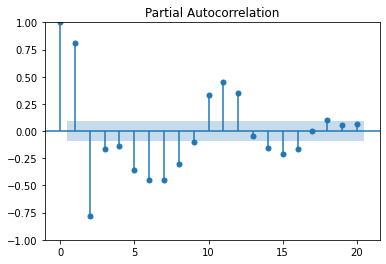

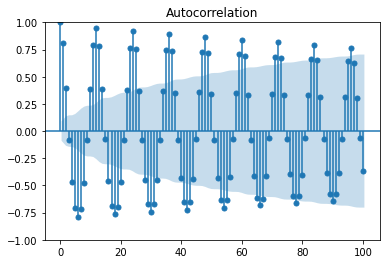

In [109]:
pacf=plot_pacf(df['T2M'],lags=20)
acf=plot_acf(df['T2M'],lags=100)


In [100]:
import warnings
warnings.filterwarnings("ignore")

In [101]:
stepwise_fit = auto_arima(df['T2M'], trace = True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2082.291, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3182.357, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2662.824, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2724.333, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4561.062, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2338.086, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2107.706, Time=0.42 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2118.484, Time=0.49 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=2084.243, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2436.178, Time=0.10 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2300.464, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2093.168, Time=0.49 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2419.045, Time=0.10 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  482
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -1035.146
Date:                Sun, 17 Oct 2021   AIC                           2082.291
Time:                        16:46:19   BIC                           2107.359
Sample:                             0   HQIC                          2092.143
                                - 482                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.2793      0.288     25.270      0.000       6.715       7.844
ar.L1          1.6494      0.018     89.912      0.000       1.613       1.685
ar.L2         -0.9228      0.019    -47.450      0.000      -0.961      -0.885
ma.L1         -0.5891      0.044    -13.274      0.000      -0.676      -0.502
ma.L2         -0.2364      0.049     -4.849      0.000      -0.332      -0.141
sigma2         4.2560      0.348     12.241      0.000       3.575       4.937
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.97   Prob(JB):                         0.05
Heteroskedasticity (H):               1.18   Skew:                            -0.15
Prob(H) (two-sided):                  0.31   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA?


In [103]:
print(df.shape)

(482, 4)


In [104]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)


(452, 4) (30, 4)


In [110]:
model=ARIMA(train['T2M'],order=(4,0,4))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    T2M   No. Observations:                  452
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -929.126
Date:                Sun, 17 Oct 2021   AIC                           1878.252
Time:                        17:29:24   BIC                           1919.389
Sample:                    02-28-1981   HQIC                          1894.463
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.6508      0.133    199.940      0.000      26.390      26.912
ar.L1          1.1085      0.093     11.971      0.000       0.927       1.290
ar.L2          0.4538      0.096      4.727      0.000       0.266       0.642
ar.L3         -1.2662      0.086    -14.715      0.000      -1.435      -1.098
ar.L4          0.3875      0.087      4.458      0.000       0.217       0.558
ma.L1         -0.3567      0.116     -3.064      0.002      -0.585      -0.129
ma.L2         -1.1616      0.134     -8.693      0.000      -1.423      -0.900
ma.L3          0.5757      0.072      7.957      0.000       0.434       0.718
ma.L4          0.3828      0.074      5.171      0.000       0.238       0.528
sigma2         3.6501      0.393      9.296      0.000       2.880       4.420
===================================================================================
Ljung-Box (L1) (Q):                   3.84   Jarque-Bera (JB):                12.27
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                            -0.28
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2018-10-31    23.312494
2018-11-30    19.264745
2018-12-31    18.174265
2019-01-31    19.408085
2019-02-28    22.834444
2019-03-31    27.004793
2019-04-30    31.197664
2019-05-31    33.877527
2019-06-30    34.797960
2019-07-31    33.341234
2019-08-31    30.375527
2019-09-30    26.299918
2019-10-31    22.637457
2019-11-30    19.918889
2019-12-31    19.254782
2020-01-31    20.343176
2020-02-29    23.271441
2020-03-31    26.798837
2020-04-30    30.402321
2020-05-31    32.711423
2020-06-30    33.574523
2020-07-31    32.383152
2020-08-31    29.926657
2020-09-30    26.464859
2020-10-31    23.355677
2020-11-30    20.987012
2020-12-31    20.381940
2021-01-31    21.231832
2021-02-28    23.693842
2021-03-31    26.656992
Freq: M, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

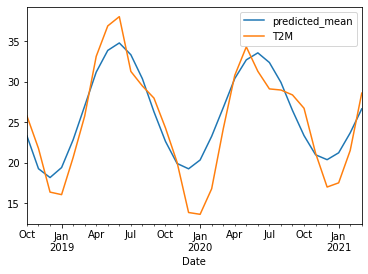

In [112]:
pred.plot(legend=True)
test['T2M'].plot(legend=True)

In [113]:
test['T2M'].mean()

25.05107195914332

In [114]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['T2M']))
print(rmse)

2.9350844170172805


In [30]:
model12=ARIMA(df['T2M'],order=(20,0,20))
model12=model12.fit()
df.tail()

,T2M,YEAR,MO,DY
Date,,,,
2020-11-30,21.189333,2020.0,11.0,15.5
2020-12-31,17.003226,2020.0,12.0,16.0
2021-01-31,17.522258,2021.0,1.0,16.0
2021-02-28,21.523214,2021.0,2.0,14.5
2021-03-31,28.602581,2021.0,3.0,16.0


In [31]:
index_future_dates=pd.date_range(start='2021-03-31',end='2021-04-30')
print(index_future_dates)

DatetimeIndex(['2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', freq='D')


In [32]:
pred=model12.predict(start=len(df),end=len(df)+30,typ='level').rename('ARIMA PREDICTION')
                                                                      

In [33]:
pred.index=index_future_dates
print(pred)

2021-03-31    33.838289
2021-04-01    36.894571
2021-04-02    35.189920
2021-04-03    31.726765
2021-04-04    29.692218
2021-04-05    28.857270
2021-04-06    26.429989
2021-04-07    21.297236
2021-04-08    16.992122
2021-04-09    16.562033
2021-04-10    20.584047
2021-04-11    27.332622
2021-04-12    33.887008
2021-04-13    36.654764
2021-04-14    35.079226
2021-04-15    31.815774
2021-04-16    29.796543
2021-04-17    28.954102
2021-04-18    26.245357
2021-04-19    21.358131
2021-04-20    17.050036
2021-04-21    16.396418
2021-04-22    20.373515
2021-04-23    27.322219
2021-04-24    33.723785
2021-04-25    36.345463
2021-04-26    34.735568
2021-04-27    31.558598
2021-04-28    29.610843
2021-04-29    28.519691
2021-04-30    25.878724
Freq: D, Name: ARIMA PREDICTION, dtype: float64


<AxesSubplot:>

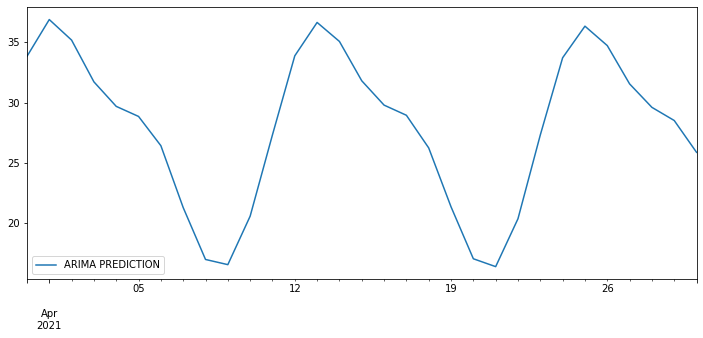

In [34]:
pred.plot(figsize=(12,5),legend=True)